DeepFake Detection

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
meta = pd.read_csv("metadata.csv")
meta

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4
...,...,...,...,...,...
95629,rqcsjlsmiz.mp4,129,129,FAKE,pbsccacgff.mp4
95630,xjmnerypjf.mp4,90,90,FAKE,qrjydgidga.mp4
95631,hnewpzhihy.mp4,75,75,FAKE,vabhbfiifl.mp4
95632,okbarlnmwm.mp4,268,267,FAKE,uqaaspbgtz.mp4


In [16]:
real_df = meta[meta["label"] == "REAL"]
fake_df = meta[meta["label"] == "FAKE"]
sample_size = 8000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [19]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [23]:
y = dict()

y[0] = []
y[1] = []

for set_name in (np.array(Train_set['label']), np.array(Val_set['label']), np.array(Test_set['label'])):
    y[0].append(np.sum(set_name == 'REAL'))
    y[1].append(np.sum(set_name == 'FAKE'))

In [39]:
Train_set

,videoname,original_width,original_height,label,original
29534,flqthiodqa.mp4,223,223,FAKE,iinudvalec.mp4
40643,rgwenetndf.mp4,154,154,REAL,NaN
12574,youvmkdlqq.mp4,155,155,REAL,NaN
59041,kztcysczln.mp4,223,223,REAL,NaN
36748,atuevnkgvs.mp4,108,107,FAKE,yybndruxch.mp4
...,...,...,...,...,...
69476,rvfkompkqt.mp4,155,155,FAKE,saprxfvznw.mp4
17964,wsakyfrbca.mp4,154,155,REAL,NaN
6796,lpitjxhwfv.mp4,89,89,FAKE,ujhjgutsfc.mp4
17775,jtkqkovbid.mp4,268,267,FAKE,mgzefmbccb.mp4


In [57]:
Train_set.loc[6796,'videoname'][:-4]+'.jpg'
Train_set.loc[6796,'label']

'FAKE'

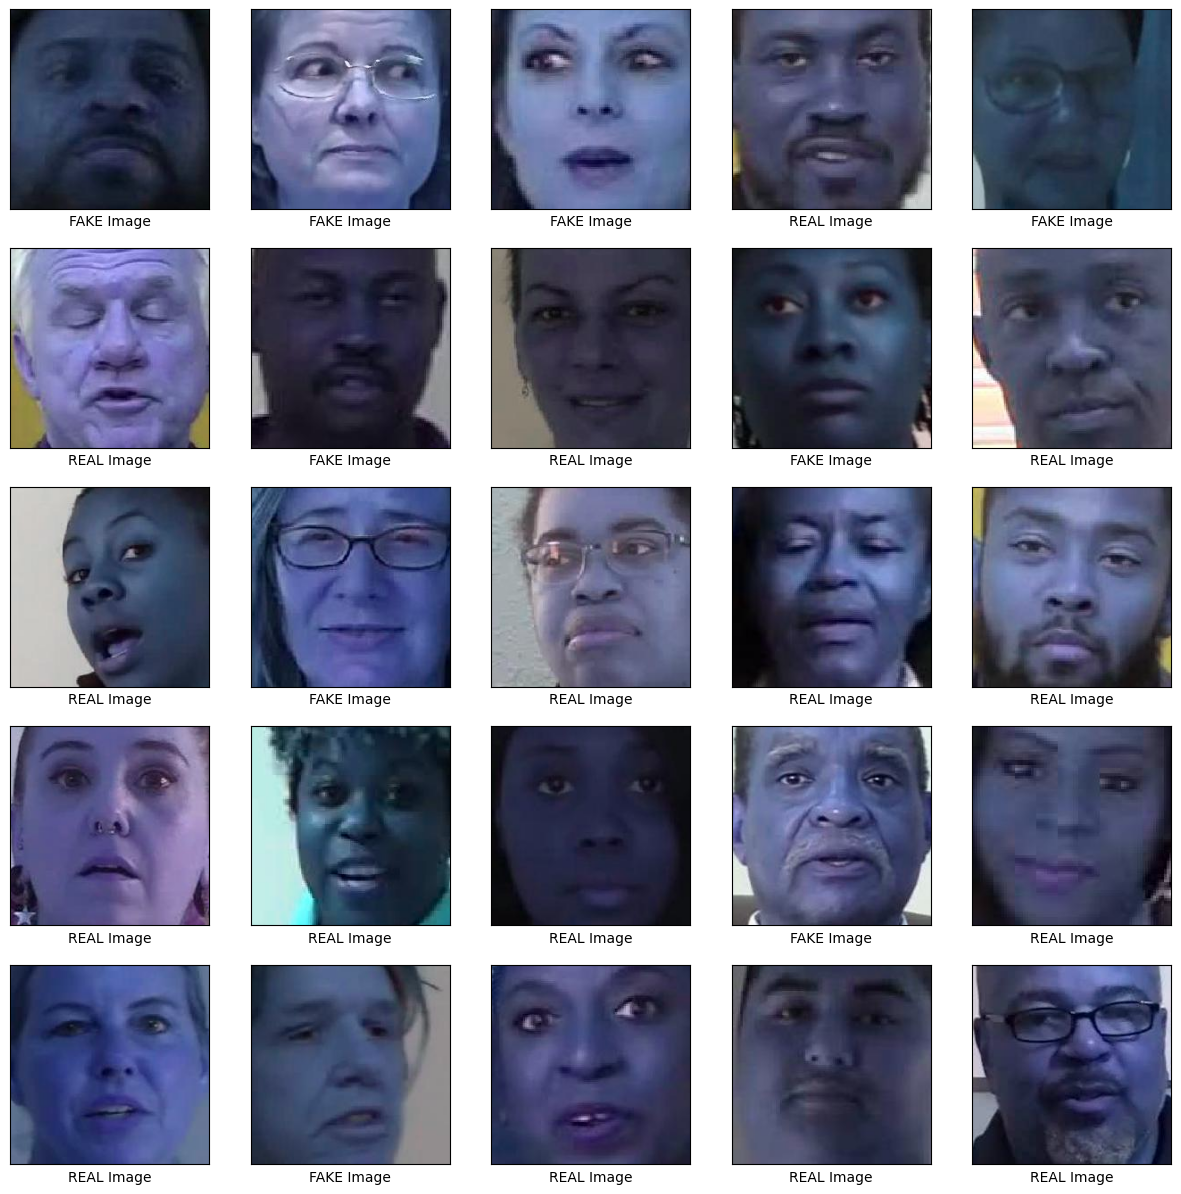

In [59]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[50:75]):
    # print(cur,i)
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(cv2.imread('faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))
    
    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')
        
plt.show()